# Benchmark ComBind on PDB ligands

In [1]:
import numpy as np
import os
from glob import glob
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from benchmark import load_chembl,  benchmark
%matplotlib inline

In [2]:
data = load_chembl('/Users/jpaggi/Downloads/combind_data/bpp_outputs/stats6_best_affinity.tsv')


mode	protein	ligand	n_ligs	alpha	features	combind_rank	combind_rmsd	glide_rank	glide_rmsd	best_rank	best_rmsd



224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224


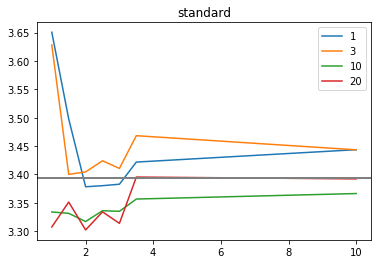

224
224
224
224
224
224
224
224
204
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224


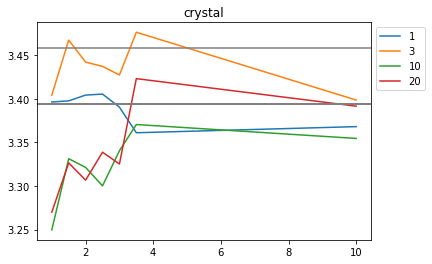

In [14]:
def performance(results):
    x, y = [], []
    for prot, ligs in results.items():
        for lig, (combind, glide, best) in ligs.items():
            x += [glide]
            y += [combind]
    print len(x)
    return (sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x)),
            sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y)))

def sweep(data, mode, feature):
    num_ligs = sorted(set(k[0] for k in data[mode].keys()))
    alpha_factors = sorted(set(k[1] for k in data[mode].keys()))
    for n in [1, 3, 10, 20]: #num_ligs:
        performances = []
        for alpha_factor in alpha_factors:
            performances += [performance(data[mode][(n, alpha_factor, feature)])]
        plt.plot(alpha_factors, [p[2] for p in performances], label = n)
        for p in performances:
            plt.axhline(p[0], c = 'grey')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(mode)
    plt.show()

sweep(data, 'standard', 'mcss_pipi_contact_hbond_sb')
sweep(data, 'crystal',  'mcss_pipi_contact_hbond_sb')

In [4]:
thresh = 2.0
def benchmark(results):
    tot = 0
    for prot, ligs in results.items():
        print prot, len(ligs)
        tot += len(ligs)
    print tot
        
    x, y = [], []
    for prot, ligs in results.items():
        for lig, (combind, glide, best) in ligs.items():
            x += [glide]
            y += [combind]

    # All ligands separately
    print ttest_rel(x, y)
    
    gap = 0.5
    print 'Combind improves pose for {} of {} ligands'.format(np.sum(np.array(x) > np.array(y)+gap),
                                                              len(x))
    print 'Combind degrades pose for {} of {} ligands'.format(np.sum(np.array(x)+gap < np.array(y)),
                                                              len(x))

    
    f, ax = plt.subplots()
    plt.scatter(x, y, alpha = 0.5, s = 10)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.title('All Ligands RMSD', fontsize = 20)
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.xticks(range(0, 15, 2), range(0, 15, 2))
    ax.set_aspect('equal', 'box')
    print 'Glide Average:  ', sum(x) / float(len(x)), sum(np.array(x) <= thresh) /  float(len(x))
    print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= thresh) /  float(len(y))
    plt.show()

    # By Protein (RMSD)
    x, y, label = [], [], []
    for prot, ligs in results.items():
        _x, _y = [], []
        for lig, (combind, glide, best) in ligs.items():
            _x += [glide]
            _y += [combind]
        label += [prot]
        x += [sum(_x)/float(len(_x))]
        y += [sum(_y)/float(len(_y))]

    markers = ['o', 'v', 'x', 's']
    f, ax = plt.subplots()
    for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
        plt.scatter(_x, _y, marker = markers[i/10], label = _label)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.title('Mean RMSD', fontsize = 20)
    plt.plot(range(10), linestyle='--', c = 'k')
    ax.set_aspect('equal', 'box')
    print 'Mean RMSD Glide:   ', sum(x) / float(len(x))
    print 'Mean RMSD Combind: ', sum(y) / float(len(y))
    plt.legend(bbox_to_anchor=(1.1, 1.05), ncol=3)
    plt.show()
    
    # By protein (% correct)
    x, y = [], []
    for prot, ligs in results.items():
        _x, _y = [], []
        for lig, (combind, glide, best) in ligs.items():
            _x += [glide <= thresh]
            _y += [combind <= thresh]
        label += [prot]
        x += [sum(_x)/float(len(_x))]
        y += [sum(_y)/float(len(_y))]

    markers = ['o', 'v', 'x', 's']
    f, ax = plt.subplots()
    for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
        plt.scatter(_x, _y, marker = markers[i/10], label = _label)
    plt.xlabel('Glide', fontsize = 16)
    plt.ylabel('ComBind', fontsize = 16)
    plt.plot(range(2), linestyle='--', c = 'k')
    plt.title('Fraction Near-Native', fontsize = 20)
    ax.set_aspect('equal', 'box')
    print 'Fraction Near-Native Glide:   ', sum(x) / float(len(x))
    print 'Fraction Near-Native Combind: ',sum(y) / float(len(y))
    plt.legend(bbox_to_anchor=(1.1, 1.05), ncol=3)
    plt.show()

BACE1 20
VDR 20
5HT2B 5
SLC6A4 4
ERA 20
CDK2 20
SMO 4
MEK1 20
AR 10
JAK2 20
BRAF 20
DAT 8
F11 13
PYGM 20
P00760 20
224
Ttest_relResult(statistic=-0.48059809150806698, pvalue=0.63127331598647718)
Combind improves pose for 6 of 224 ligands
Combind degrades pose for 7 of 224 ligands
Glide Average:   3.39447910073 0.566964285714
ComBind Average: 3.41774542553 0.5625


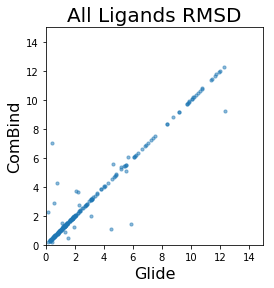

Mean RMSD Glide:    3.32031840552
Mean RMSD Combind:  3.3296198129


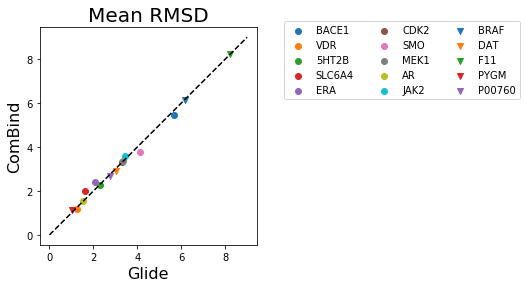

Fraction Near-Native Glide:    0.556794871795
Fraction Near-Native Combind:  0.553461538462


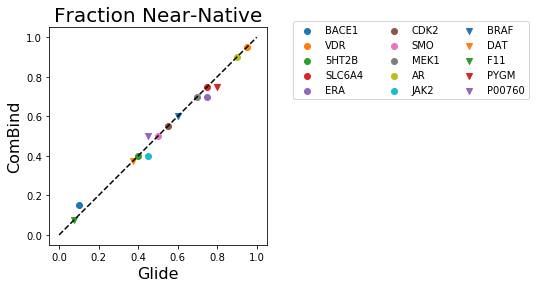

In [5]:
benchmark(data['standard'][(3, 10.0, 'pipi_contact_hbond_sb')])